In [25]:
#This uses the same mechansims. 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#From sklearn tutorial.
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))


Type of boston dataset: <class 'sklearn.utils.Bunch'>


In [10]:
# Let's change the data to a Panda's Dataframe
import pandas as pd
boston_df = pd.DataFrame(boston['data'] )

#Now add the column names.
boston_df.columns = boston['feature_names']

boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
boston_df['CHAS']=boston_df['CHAS'].astype(object)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


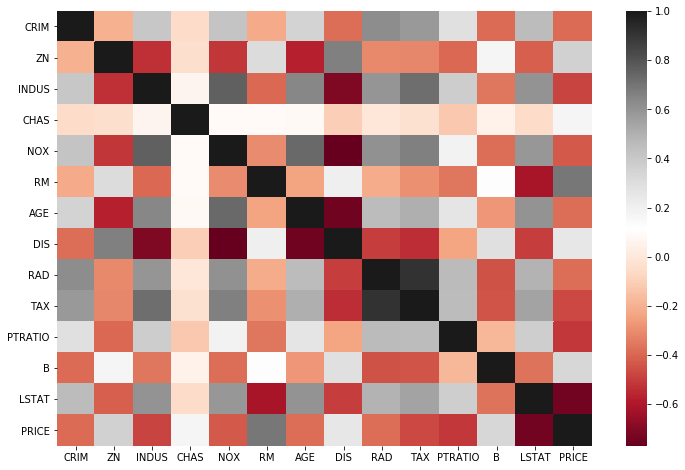

In [11]:
plt.subplots(figsize=(12,8))
sns.heatmap(boston_df.corr(), cmap = 'RdGy')

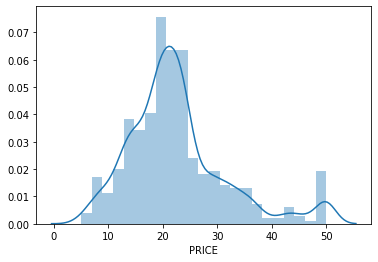

In [12]:
#Let's us seaborn, because it is pretty. ;) 
sns.distplot(boston_df['PRICE']);

## Preparing to Model 
- It is common to separate `y` as the dependent variable and `X` as the matrix of independent variables.
- Here we are using `train_test_split` to split the test and train.
- This creates 4 subsets, with IV and DV separted: `X_train, X_test, y_train, y_test`
 


In [16]:
#This will throw and error at import if haven't upgraded. 
# from sklearn.cross_validation  import train_test_split  
from sklearn.model_selection  import train_test_split
#y is the dependent variable.
y = boston_df['PRICE']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(404, 13) (102, 13) (404,) (102,)


In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, y_train)

print(DT_reg.score(X_train,y_train))
print(DT_reg.score(X_test,y_test))


0.953927306484727
0.6079996234797299


In [19]:
y_pred=DT_reg.predict(X_test)
y_pred

array([23.86923077, 19.96875   , 19.96875   , 13.945     , 21.51129032,
       21.51129032, 21.51129032, 21.51129032, 21.51129032, 16.1       ,
        8.345     , 17.55      , 13.945     ,  8.345     , 48.5       ,
       33.87      , 21.51129032, 33.87      , 25.6375    , 21.51129032,
       23.86923077, 19.96875   , 19.96875   , 23.86923077, 21.51129032,
       16.1       , 19.96875   , 15.3       , 40.75      , 18.45294118,
       13.945     , 19.96875   , 19.96875   , 21.51129032, 19.96875   ,
       19.96875   ,  8.345     , 19.96875   , 13.945     , 17.55      ,
       21.51129032, 21.51129032, 21.51129032, 13.945     , 28.        ,
       19.96875   , 19.63333333, 15.3       , 15.168     , 22.4       ,
       15.3       , 18.45294118, 21.51129032, 35.2       , 15.3       ,
       19.63333333, 21.51129032, 21.51129032, 10.9       , 19.63333333,
       23.86923077, 21.51129032, 33.87      , 25.6375    , 21.51129032,
       25.6375    , 18.45294118, 22.36      , 16.13333333, 21.51

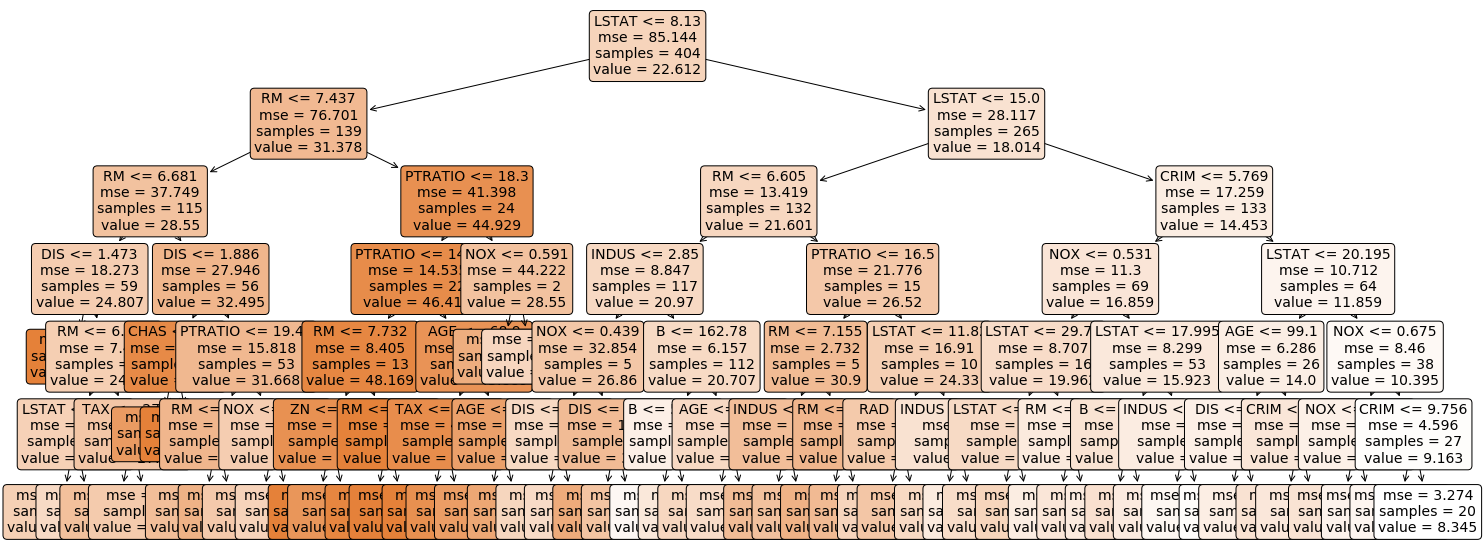

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

Text(0, 0.5, 'Predicted Y')

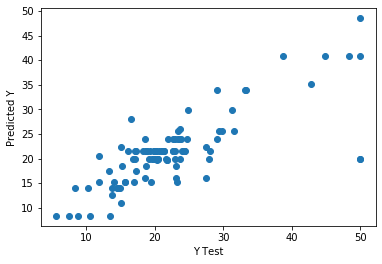

In [23]:

plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.363055848437755
MSE: 31.91997877172238
RMSE: 5.649776878047697
